# 필수과제
- 단순한 raw데이터를 가공+ 변수를 선정하여 회귀식의 값들을 더 높이기
- 스케일링, 변수 선정될 수 있고, 다양한 방법을 통해서 바로 ols 확인한 결과와 비교해 수치를 더 높이기
- 수치를 높이는 것을 진행하면서, 어떤 부분을 변화를 주었을 때 수치들이 올라갔는지를 정리


In [281]:
import sklearn
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [282]:
# 데이터 불러오기
calhouse = sklearn.datasets.fetch_california_housing()
dfx = pd.DataFrame(calhouse.data, columns = calhouse.feature_names)
dfy = pd.DataFrame(calhouse.target, columns =['y'])
df = pd.concat([dfx,dfy],axis=1)

In [283]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 1.데이터를 가공하지 않은 상태에서 결과 확인

In [284]:
model1 = sm.OLS.from_formula('y~'+'+'.join(calhouse.feature_names),data=df)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:33:43   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 변수들 간 설명력(R-squared) : 0.606
- 변수들 간 상관관계(Cond. No.) : 2.38e+05, 상관관계 매우 높게 나타남
- Population의 P>|t|가 0.402로, 유의확률보다 커 변수가 유의미하지 않음

# 2-1.데이터 이상치 제거 후 결과 확인

In [285]:
# 이상치 제거
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    removed_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    # 이상치 세기
    num_outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].shape[0]
    print(f"이상치 개수: {num_outliers}")
    
    return removed_df

df2 = remove_outliers(df, list(df.columns))

이상치 개수: 20640


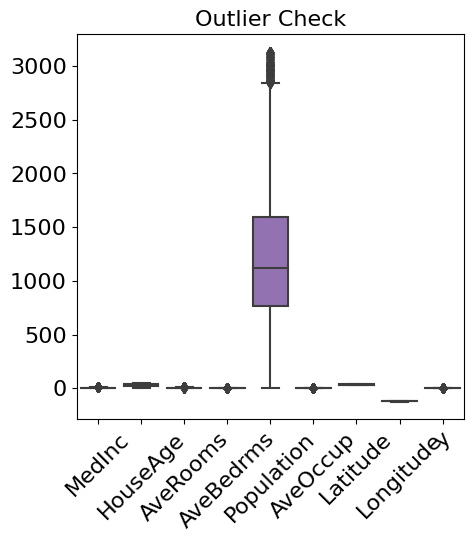

In [286]:
# 데이터 이상치 제거 후 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(df2)
plt.title("Outlier Check",fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

In [287]:
model2 = sm.OLS.from_formula('y~'+'+'.join(calhouse.feature_names),data=df2)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3602.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:33:44   Log-Likelihood:                -13902.
No. Observations:               16312   AIC:                         2.782e+04
Df Residuals:                   16303   BIC:                         2.789e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.1447      0.631    -50.927      0.000     -33.382     -30.908
MedInc         0.4513      0.005     83.047      0.000       0.441       0.462
HouseAge       0.0105      0.000     25.759      0.000       0.010       0.011
AveRooms      -0.1227      0.007    -17.280      0.000      -0.137      -0.109
AveBedrms      1.2703      0.074     17.249      0.000       1.126       1.415
Population  8.007e-05   7.72e-06     10.368      0.000    6.49e-05    9.52e-05
AveOccup      -0.3661      0.008    -48.104      0.000      -0.381      -0.351
Latitude      -0.3870      0.007    -56.019      0.000      -0.401      -0.373
Longitude     -0.3859      0.007    -53.634      0.000      -0.400      -0.372
==============================================================================
Omnibus:                     2038.709   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.691
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                       4.873   Cond. No.                     2.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 변수들 간 설명력(R-squared) : 0.639
- 변수들 간 상관관계(Cond. No.) : 2.02e+05, 상관관계 매우 높게 나타남

# 2-2. 스케일링한 후 결과 확인(+이상치 제거)

In [288]:
# 독립변수들의 데이터 스케일링
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X = df2.drop('y', axis = 1)
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X))
scaled_X.columns = df.columns[:-1]
scaled_X

# 종속변수 스케일링
scaler_y = StandardScaler()
y = np.array(df2['y']).reshape(-1,1)
scaler_y.fit(y)
scaled_y = pd.DataFrame(scaler_y.transform(y))
scaled_y.columns = ['y']
scaled_y

# 스케일링한 데이터 합치기
df3 = pd.concat([scaled_X, scaled_y], axis = 1)
df3.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,NaN,0.982143,1.512279,-0.368179,-1.409744,-0.456390,1.052548,-1.327835,2.742648
1,NaN,-0.607019,0.865898,-1.153764,1.830398,-1.167607,1.043185,-1.322844,1.756648
2,2.418701,1.856182,2.642167,0.382729,-1.138563,-0.062729,1.038503,-1.332827,1.689588
3,1.334147,1.856182,0.501299,0.376875,-1.041935,-0.468534,1.038503,-1.337818,1.576423
4,0.126914,1.856182,0.903777,0.498228,-1.031026,-1.053316,1.038503,-1.337818,1.585853


In [289]:
model22 = sm.OLS.from_formula('y~'+'+'.join(df3.columns[:-1]),data=df3)
res22 = model22.fit()
res22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3602.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:33:44   Log-Likelihood:                -14664.
No. Observations:               16312   AIC:                         2.935e+04
Df Residuals:                   16303   BIC:                         2.942e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0008      0.005     -0.176      0.860      -0.010       0.008
MedInc         0.7038      0.008     83.047      0.000       0.687       0.720
HouseAge       0.1387      0.005     25.759      0.000       0.128       0.149
AveRooms      -0.1483      0.009    -17.280      0.000      -0.165      -0.132
AveBedrms      0.0880      0.005     17.249      0.000       0.078       0.098
Population     0.0538      0.005     10.368      0.000       0.044       0.064
AveOccup      -0.2404      0.005    -48.104      0.000      -0.250      -0.231
Latitude      -0.8660      0.015    -56.019      0.000      -0.896      -0.836
Longitude     -0.8101      0.015    -53.634      0.000      -0.840      -0.781
==============================================================================
Omnibus:                     2038.709   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.691
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                       4.873   Cond. No.                         6.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 변수들 간 설명력(R-squared) : 0.639으로, 스케일링 전과 결과가 나옴
- 변수들 간 상관관계(Cond. No.) : 6.83, 스케일링 전에 비해 매우 감소

# 중간결론
- 이상치를 제거함으로써 변수들 간의 설명력이 증가하였다(0.606->0.639)
- 데이터의 스케일링을 통해 변수들 간의 상관관계가 매우 많이 감소하였다(2.38e+05->6.83)
- 또한 이상치 제거와 스케일링 과정을 통해 모든 변수들이 유의미해졌다(모든 변수들의 P>|t|값이 0.05보다 작음)

In [290]:
print(res1.summary().tables[0],"\n" ,res2.summary().tables[0],"\n",res22.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:33:44   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squa

In [291]:
print(res1.summary().tables[1],"\n" ,res2.summary().tables[1],"\n",res22.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

# 3.변수들 간 상관관계 제거 후 결과 확인

<Axes: >

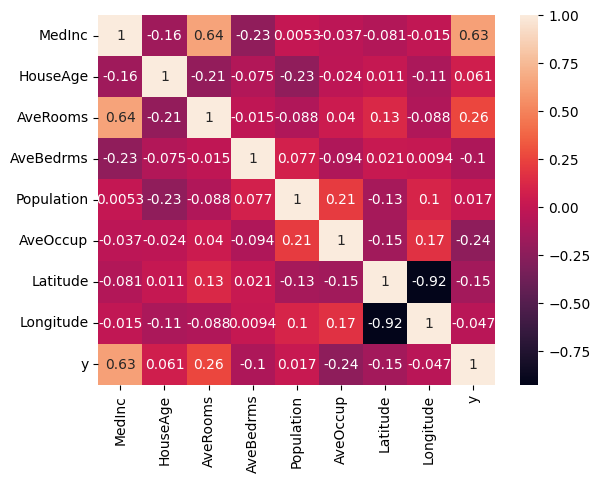

In [292]:
# 변수들 간 상관관계 비교
import seaborn as sns
sns.heatmap(df3.corr(), annot=True)

- Longitude, Latitude의 상관관계가 -0.92로 높은 음의 상관관계를 보임
- AveRooms, AveBedrooms의 상관관계가 0.85로 높은 양의 상관관계를 보임
- MedInc, AveRooms의 상관관계가 0.64로 높은 양의 상관관계를 보임

##3-1.Latitude, AveRooms 열 제거

In [293]:
df4 = df3.drop(['Latitude','AveRooms'], axis = 1)
df4.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Longitude,y
0,NaN,0.982143,-0.368179,-1.409744,-0.456390,-1.327835,2.742648
1,NaN,-0.607019,-1.153764,1.830398,-1.167607,-1.322844,1.756648
2,2.418701,1.856182,0.382729,-1.138563,-0.062729,-1.332827,1.689588
3,1.334147,1.856182,0.376875,-1.041935,-0.468534,-1.337818,1.576423
4,0.126914,1.856182,0.498228,-1.031026,-1.053316,-1.337818,1.585853


In [295]:
# 독립변수들의 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df4.drop('y', axis = 1)
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X))
scaled_X.columns = df4.columns[:-1]

# 종속변수 스케일링
scaler_y = StandardScaler()
y = np.array(df4['y']).reshape(-1,1)
scaler_y.fit(y)
scaled_y = pd.DataFrame(scaler_y.transform(y))
scaled_y.columns = ['y']

# 스케일링한 데이터 합치기
df_scaled = pd.concat([scaled_X, scaled_y], axis = 1)
df_scaled.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Longitude,y
0,NaN,0.982143,-0.368179,-1.409744,-0.456390,-1.327835,2.742648
1,NaN,-0.607019,-1.153764,1.830398,-1.167607,-1.322844,1.756648
2,2.418701,1.856182,0.382729,-1.138563,-0.062729,-1.332827,1.689588
3,1.334147,1.856182,0.376875,-1.041935,-0.468534,-1.337818,1.576423
4,0.126914,1.856182,0.498228,-1.031026,-1.053316,-1.337818,1.585853


In [296]:
model31 = sm.OLS.from_formula('y~'+'+'.join(df_scaled.columns[:-1]),data=df_scaled)
res31 = model31.fit()
res31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     2967.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:34:04   Log-Likelihood:                -17030.
No. Observations:               16365   AIC:                         3.407e+04
Df Residuals:                   16358   BIC:                         3.413e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0096      0.005      1.771      0.077      -0.001       0.020
MedInc         0.6956      0.006    119.414      0.000       0.684       0.707
HouseAge       0.2532      0.006     42.938      0.000       0.242       0.265
AveBedrms      0.0601      0.006     10.786      0.000       0.049       0.071
Population     0.1144      0.006     19.545      0.000       0.103       0.126
AveOccup      -0.2735      0.006    -48.704      0.000      -0.285      -0.262
Longitude      0.0263      0.006      4.771      0.000       0.015       0.037
==============================================================================
Omnibus:                     1620.453   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2531.448
Skew:                           0.736   Prob(JB):                         0.00
Kurtosis:                       4.243   Cond. No.                         1.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 변수들 간 설명력(R-squared) : 0.521로, 열을 제거하기 전보다 오히려 작아짐
- 변수들 간 상관관계(Cond. No.) : 	1.56, 상관관계 매우 낮게 나타남

## 3-2 Longtitude, AveRooms 열 제거

In [297]:
df5 = df3.drop(['Longitude','AveRooms'], axis = 1)
df5.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,y
0,NaN,0.982143,-0.368179,-1.409744,-0.456390,1.052548,2.742648
1,NaN,-0.607019,-1.153764,1.830398,-1.167607,1.043185,1.756648
2,2.418701,1.856182,0.382729,-1.138563,-0.062729,1.038503,1.689588
3,1.334147,1.856182,0.376875,-1.041935,-0.468534,1.038503,1.576423
4,0.126914,1.856182,0.498228,-1.031026,-1.053316,1.038503,1.585853


In [299]:
# 독립변수들의 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df5.drop('y', axis = 1)
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(X))
scaled_X.columns = df5.columns[:-1]

# 종속변수 스케일링
scaler_y = StandardScaler()
y = np.array(df5['y']).reshape(-1,1)
scaler_y.fit(y)
scaled_y = pd.DataFrame(scaler_y.transform(y))
scaled_y.columns = ['y']

# 스케일링한 데이터 합치기
df_scaled2 = pd.concat([scaled_X, scaled_y], axis = 1)
df_scaled2.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,y
0,NaN,0.982143,-0.368179,-1.409744,-0.456390,1.052548,2.742648
1,NaN,-0.607019,-1.153764,1.830398,-1.167607,1.043185,1.756648
2,2.418701,1.856182,0.382729,-1.138563,-0.062729,1.038503,1.689588
3,1.334147,1.856182,0.376875,-1.041935,-0.468534,1.038503,1.576423
4,0.126914,1.856182,0.498228,-1.031026,-1.053316,1.038503,1.585853


In [300]:
model32 = sm.OLS.from_formula('y~'+'+'.join(df_scaled.columns[:-1]),data=df_scaled2)
res32 = model32.fit()
res32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     3186.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:36:09   Log-Likelihood:                -16721.
No. Observations:               16365   AIC:                         3.346e+04
Df Residuals:                   16358   BIC:                         3.351e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0131      0.005      2.470      0.014       0.003       0.023
MedInc         0.6826      0.006    119.027      0.000       0.671       0.694
HouseAge       0.2458      0.006     42.577      0.000       0.234       0.257
AveBedrms      0.0606      0.005     11.072      0.000       0.050       0.071
Population     0.1026      0.006     17.823      0.000       0.091       0.114
AveOccup      -0.2895      0.005    -52.753      0.000      -0.300      -0.279
Latitude      -0.1372      0.005    -25.593      0.000      -0.148      -0.127
==============================================================================
Omnibus:                     1686.942   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2712.224
Skew:                           0.748   Prob(JB):                         0.00
Kurtosis:                       4.319   Cond. No.                         1.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 변수들 간 설명력(R-squared) : 0.539로, 마찬가지로 열을 제거하기 전보다 오히려 작아짐
- 변수들 간 상관관계(Cond. No.) : 	1.56, 상관관계 매우 낮게 나타남

# 최종 결과 정리

- 변수들 간 상관관계가 높은 변수들을 제거할때보다 제거하지 않았을 때 더 높은 설명력을 보였다.
- 변수들을 제거함으로써 변수들 간 상관관계를 나타내는 Cond. No.는 더 감소하였다.
- 이번 데이터에서는 이상치 제거 후 스케일링까지만 했을때의 결과가 가장 좋은 것으로 보인다.

In [301]:
print(res22.summary().tables[0],"\n",res31.summary().tables[0],"\n",res32.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3602.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:42:22   Log-Likelihood:                -14664.
No. Observations:               16312   AIC:                         2.935e+04
Df Residuals:                   16303   BIC:                         2.942e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squa

In [302]:
print(res22.summary().tables[1],"\n",res31.summary().tables[1],"\n",res32.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0008      0.005     -0.176      0.860      -0.010       0.008
MedInc         0.7038      0.008     83.047      0.000       0.687       0.720
HouseAge       0.1387      0.005     25.759      0.000       0.128       0.149
AveRooms      -0.1483      0.009    -17.280      0.000      -0.165      -0.132
AveBedrms      0.0880      0.005     17.249      0.000       0.078       0.098
Population     0.0538      0.005     10.368      0.000       0.044       0.064
AveOccup      -0.2404      0.005    -48.104      0.000      -0.250      -0.231
Latitude      -0.8660      0.015    -56.019      0.000      -0.896      -0.836
Longitude     -0.8101      0.015    -53.634      0.000      -0.840      -0.781
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------